<div>
<img src="../assets/ittc_logo_full.png" width="500"/>
</div>


# Practical 5: Visualisation

## In this practical

In this practical you will:

1. Create visualisations in Python using matplotlib's pyplot toolbox
2. Use matplotlib to make adjustments to Pandas plots
3. Explore statistical visualisations techniques

## 1. Module imports

Like last practical, we first need to import matplotlib's functionality

As we only need to `matplotlib`'s `pyplot` toolbox, we'll only import that and rename it to `plt` to make typing easier.
We'll also import `pandas` like the last two practicals.
We'll also be using a new library, `seaborn`, which allows us to do advanced plotting using matplotlib in a much simpler way

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn

# 2. Importing, cleaning, and first visualisations

The first steps in trying to extract insights out of data is to import it and clean it, like the previous practicals. For this practical, we'll be using a few files. They are:
- Gapminder GDP
    Gross Domestic Product (GDP) per capita, which measures the value of everything produced in a country during a year divided by the total number of people. The units are in "international dollars", a virtual currency adjusted for purchasing power and roughly equivalent to a US dollar.

In [4]:
run_data_path = "../data/run17.csv"
run_df = pd.read_csv(run_data_path)
run_df

,bib,name,sex,age,city,net_sec,event
0,6,Hiwot G.,F,21.0,Ethiopia,3217.0,10 Mile
1,22,Buze D.,F,22.0,Ethiopia,3232.0,10 Mile
2,16,Gladys K.,F,31.0,Kenya,3276.0,10 Mile
3,4,Mamitu D.,F,33.0,Ethiopia,3285.0,10 Mile
4,20,Karolina N.,F,35.0,Poland,3288.0,10 Mile
...,...,...,...,...,...,...,...
19956,23701,David M.,M,65.0,"Auburn, AZ",4319.0,5K
19957,15179,Edward S.,M,40.0,"Eldersburg, MD",4500.0,5K
19958,23421,John P.,M,67.0,"Baltimore, MD",4501.0,5K
19959,25160,Jony R.,M,37.0,"Woodbridge, VA",5287.0,5K


### Data exploration

The first step in understand data is to get an intuitive understanding of what your datasets contains. Explore the data using the following dataframe **methods**:
- `df.info()`
- `df.describe()`
- `df['column'].unique()` for a given column


<!-- Think about how you would answer the following questions:
1. What ages are represented?
2. How many countries are represented in the dataset?
3. Are there any trends for GDP against life expectancy? -->

In [6]:
# Info - check that Non-Null are equal to the total number of entries!
run_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19961 entries, 0 to 19960
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bib      19961 non-null  int64  
 1   name     19961 non-null  object 
 2   sex      19961 non-null  object 
 3   age      19960 non-null  float64
 4   city     19960 non-null  object 
 5   net_sec  19958 non-null  float64
 6   event    19961 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.1+ MB


In [7]:
# Describe

In [8]:
# Unique City

In [9]:
# Unique values of other categorical variables

#### Preparing a visualisation

A good visualisation includes several elements
- Well labelled axes (including units!)
- Clearly presented information
If you are ever unsure of how to use a method, the documentation is your friend. 

You can find the documentation for the pandas DataFrame `plot.scatter` method [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html). 

Note the invert operator `~` being used on boolean (true/false) data

Getting an idea of the overall breakdown

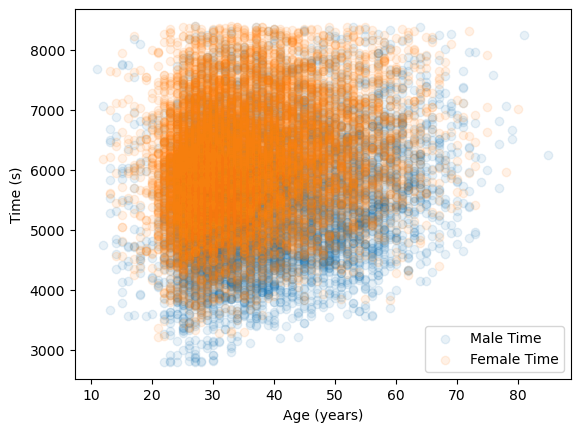

In [12]:
# plot `gdpPercap` against `lifeExp`
# hint: like last practical, plt.scatter()
long_run_df = run_df[run_df["event"] == "10 Mile"]
mask = long_run_df["sex"] == "M"
male_df = long_run_df[mask]
female_df = long_run_df[~mask]

plt.scatter(x=male_df["age"], y=male_df["net_sec"], alpha=0.1)
plt.scatter(x=female_df["age"], y=female_df["net_sec"], alpha=0.1)

plt.xlabel("Age (years)")
plt.ylabel("Time (s)")
plt.legend(["Male Time", "Female Time"])
plt.show()

# Seaborn - Advanced visualisation

Seaborn is another python library based on and built around `matplotlib`.   
It provides a high-level interface and intelligent defaults to produce attractive yet informative statistical graphs.

# Distributional understanding
Before doing statistical analysis, you need to understand the underlying data and how it is distributed.

Seaborn makes a lot of this easier, less time consuming, and pretty by default.  
We'll use seaborn's  `displot` function, short for distribution plot

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


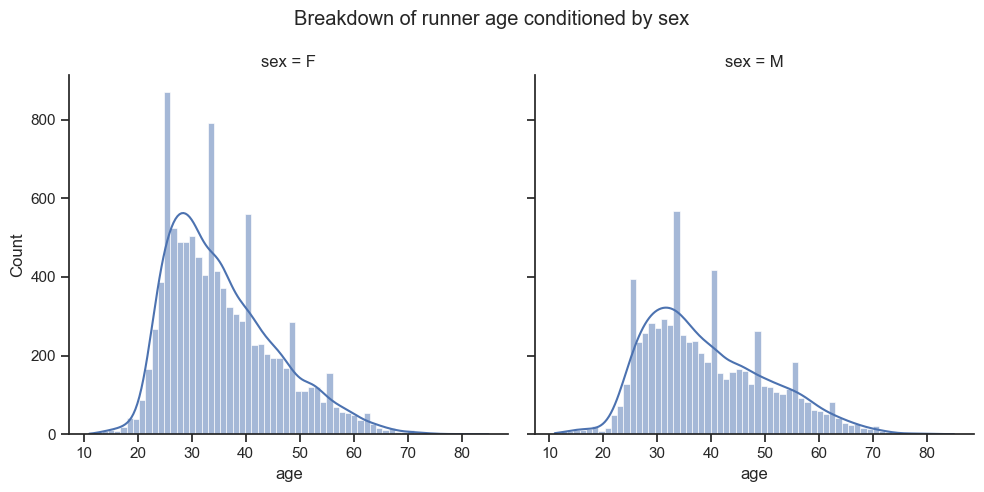

In [14]:
seaborn.set_theme(style="ticks")
seaborn.displot(data=long_run_df, x="age", col="sex", kde=True)

plt.suptitle("Breakdown of runner age conditioned by sex")
plt.tight_layout()

❓ What relationships can you see in the plot above? Is there anything worth investigating?

### Seaborn theme

Seaborn allows us to update all future figures by setting a theme, without needing to pass in arguments.  

Try reproducing the above plot but with the pre-made theme `style` called `darkgrid`

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


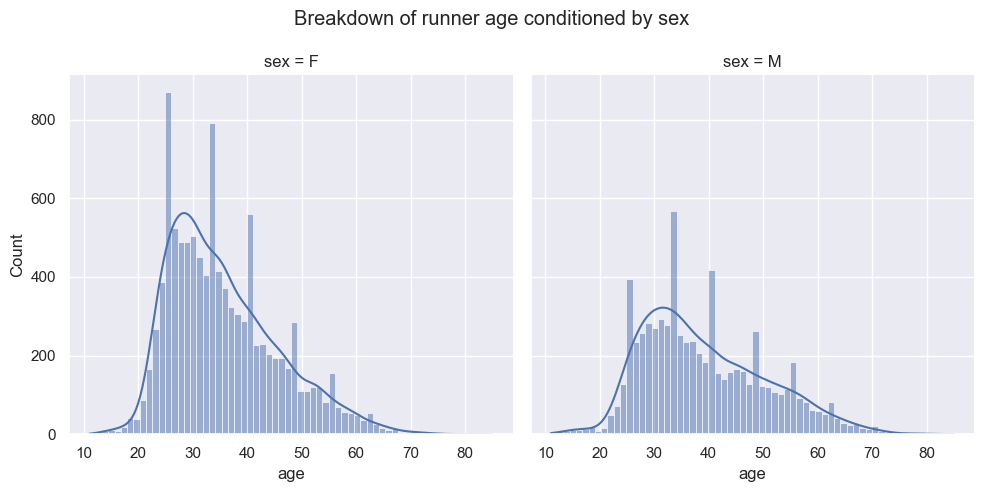

In [25]:
seaborn.set_theme(style="darkgrid")

seaborn.displot(data=long_run_df, x="age", col="sex", kde=True)

plt.suptitle("Breakdown of runner age conditioned by sex")
plt.tight_layout()

### Scatter Matrix for Data exploration
A common technique for exploring relationships is called a scatter matrix, which scatters each variable against another.
We can also assign colours based on categorcal attributes, such as `sex`

In [ ]:
# note that darkgrid theme set above is still active
seaborn.pairplot(long_run_df, hue="sex", plot_kws={"alpha": 0.1}, palette={"M": "blue", "F": "red"})

❓ Questions
- What trends can you see in the data above?
- Discuss what other visualisations might you make (using `matplotlib` or `seaborn`) to explore relationships in the data? How might you condition or display the data beforehand?

Make another two more plots based on your discussion, possibly creating a new, conditioned dataframe to plot

In [ ]:
# Vis 1

In [ ]:
# Vis 2

# Belt wear
Let's use the belt wear data from the lecture to explore what makes a good visualisation
- The thickness along an 1800mm long drive-belt is measured at various points ("X") on installation
- The thickness at these points is then re-measured at several other dates and noted in "Result" as a measurement in mm
- This data is stored in a spreadsheet

In [ ]:
belt_wear_df = pd.read_csv("../data/belt.csv")
belt_wear_df

In [ ]:
# Belt wear info, describe, etc

In [ ]:
# Get date to correct type data
belt_wear_df["Test Date"] = pd.to_datetime(belt_wear_df["Test Date"])
# Create a "relative test date" column
belt_wear_df["Relative Test Date (days)"] = (
    belt_wear_df["Test Date"] - belt_wear_df["Test Date"].min()
).dt.days
belt_wear_df.info()

#### ❓ Whats wrong with the below plot?
Run the below cell to produce a figure, and think about what may be wrong

In [ ]:
seaborn.scatterplot(belt_wear_df, x="X", y="Result", hue="Test Date")

#### 🏆 Challenge: Create a better plot using the elements of visualisations shown in the lecture:
- Scale
- Conditioning
- Perception - Colour and length
- Transformations
- Context
- Smoothing and other large data considerations
Not all of these may be applicable

<details>
<summary>Some hints and suggestions (click me):</summary>

- Make the plot bigger with `plt.figure(figsize=(x,y))` (you will need to create the figure before plotting, otherwise a second figure is made and the first is unchanged)
- Create a "Relative Test Date (days)" column and colour by that, rather than an absolute date
- Use a colour scale (such as 'viridis') for the test dates , not random colours. See [here](https://seaborn.pydata.org/tutorial/color_palettes.html)  
- Connect the lines for a given date
- Include a legend
- Use x and y axes labels that are easier to understand 
    - What actually are "X" and "Result"?
    - Include units!
- Set the y-axes limits properly
- Create a good title with `plt.suptitle` (short for super title) 


To do all of this, read the [scatterplot documentation](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) and find the correct methods.  
</details>




Talk to your neighbours and see what they do!

In [ ]:
# Make your plot better in this cell!
seaborn.scatterplot(belt_wear_df, x="X", y="Result", hue="Test Date")

# Exploring complex relationships in Concrete data

Let's switch back to use a reliability dataset that while a little less clearcut, may be more relevant.

Let's do some exploratory data analysis to better understand it:
- Understand data information
- Understand data distributions
- Understand any particularly clear relationships with a scatterplot Matrix
- Improving Visualisations

In [ ]:
conrete_path = "../data/concrete.csv"
concrete_df = pd.read_csv(conrete_path)
concrete_df

`seaborn.displot` documentation can be found here: https://seaborn.pydata.org/generated/seaborn.displot.html

In [ ]:
# create a displot of concrete age
# seaborn.displot() of "Age"


# Esnure your axes are labeled and you have a plt.suptitle()

# tight layout helps in case of overlap issues
plt.tight_layout()

#### 🖊 Example analysis: does the amount of water play a role in compressive strength?
1. Get an understanding of how your variables are distributed

In [ ]:
# seaborn.displot() of "Water"


# Esnure your axes are labeled and you have a plt.suptitle()

# tight layout helps in case of overlap issues
plt.tight_layout()

2. Come up with a way a way of conditioning data, e.g. resample water data into categorical bins. We can use `pd.cut` for this, by giving it bins based on the above plot. 

[pd.cut](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) is somewhat similar to pd.resample, but will transform one column into categories based on the bins given

You could start by trying `bins = [120, 160, 200, 240]`

In [ ]:
bins = []  # Fill me in!
# Adding a new column called "water_bin"
concrete_df["water_bin"] = pd.cut(x=concrete_df["Water"], bins=bins)
# Showing the new column we made
concrete_df["water_bin"]

3. Visualise!

In [ ]:
# Make a displot of "CompressiveStrength" with the `col` arugment` being our new data column: "water_bin"
seaborn.displot(data=concrete_df, x="fill me!", col="fill me!", kde=True)

plt.suptitle("Distribution of water used in concrete")
plt.tight_layout()

Did you gather any insights?

Would more bins make a difference?

Are there any other variables you might want to have a look into?

## What next?
After making observations of the data finding possible correlations, what do you do next?
1. Form a Hypothesis
2. Test with an experiment
3. Analysis Data
4. Report Conclusion
5. Repeat...

# 🏆 Bonus: Chemical Data
Time permitting, perform similar analysis of the chemical data.


In [ ]:
# import csv file from the ../data directory and save as a variable
# dataframe looking wierd? make sure to use header=1
pd.read_csv("../data/chemicalmanufacturingprocess.csv", header=1)

In [ ]:
# info, describe, etc

Before going too far, note that there are 58 variables. Trying to correlate all these plots will results in $58 \cdot 58 = 3364 plots$! This image is roughly 14000x14000 pixels and might take your jupyter notebook some time to produce and be hard to read. 

Some general methods to deal with this:
1. Make smart decisions about which factors to look at based on real world information and prior knowledge (cant do that here)
2. Arbitrarily select some columns to process (better than not doing anything)
3. 
2. Perform dimensionality reduction. e.g. Perform Principle Component Analysis (PCA) and only analyse the principle components with the most variance.
4. Contact your data science team....


While we wont perform PCA here, for extra reading, see [PCA from the `scikitlearn` package](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)


In [ ]:
# Select some columns to look at

In [ ]:
# some basic plots of some single variables

In [ ]:
# Some mutlivariate analysis